## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical


reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

new_Y = to_categorical(Y,2)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

reviews = reviews.replace({"br": ""}, regex=True)

vectorizer = CountVectorizer(max_features=10000)

y = np.array(Y)
X = vectorizer.fit_transform(reviews[0]).toarray()

# How the data is split: train: 70%, validation: 15%, test: 15%
X_train, X_test, y_train, y_test = train_test_split(X, new_Y, test_size=0.30, random_state=42) 


In [3]:
print(X.shape)


(25000, 10000)


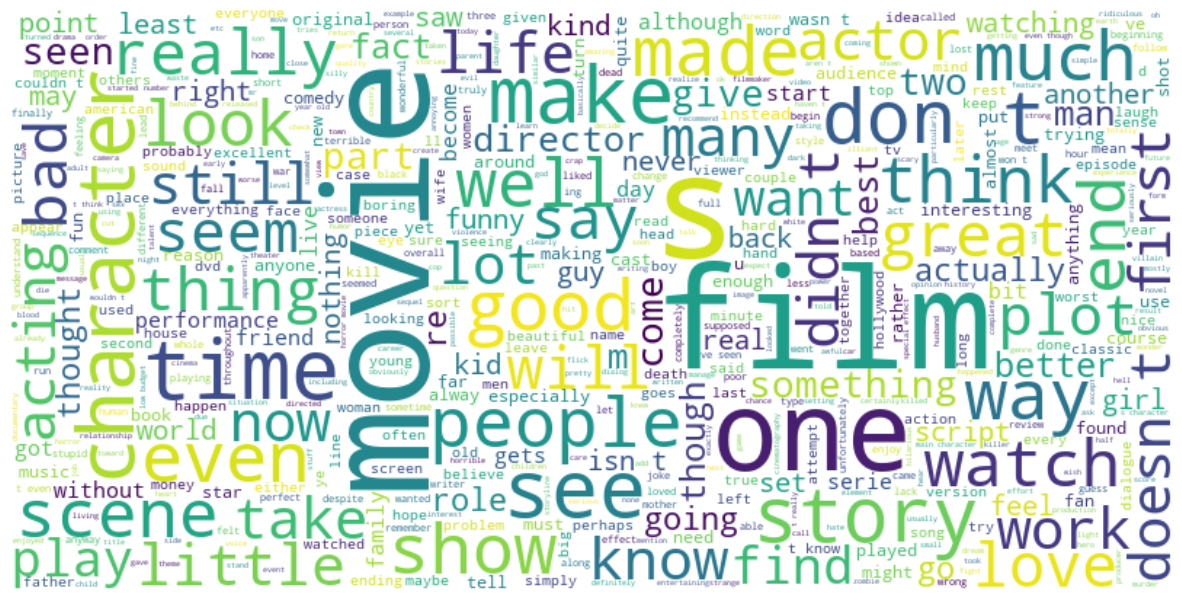

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(word for word in reviews[0])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=10000, background_color="white").generate(text)

# Display the word cloud image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()


In [5]:
X.shape[1]

10000

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
input_dim = X.shape[1]

model = tf.keras.Sequential()
model.add(layers.Dense(units=1000, input_dim=input_dim, activation="tanh"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=2, activation="softmax"))


model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])  
sgd = optimizers.SGD(learning_rate = 0.1)  # I use SGD because we have learned about it and I sort off understand what happens

c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2) 

print("Accuracy on training data: {}".format(model.evaluate(X_train, y_train)))

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5820 - loss: 0.9739 - val_accuracy: 0.7806 - val_loss: 0.4782
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7274 - loss: 0.6053 - val_accuracy: 0.8063 - val_loss: 0.4389
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7571 - loss: 0.5623 - val_accuracy: 0.7934 - val_loss: 0.4505
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7973 - loss: 0.4838 - val_accuracy: 0.7837 - val_loss: 0.5208
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8051 - loss: 0.4646 - val_accuracy: 0.8297 - val_loss: 0.3948
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8278 - loss: 0.4293 - val_accuracy: 0.8074 - val_loss: 0.4471
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8336 - loss: 0.4082 - val_accuracy: 0.8531 - val_loss: 0.3447
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8485 - loss: 0.3848 - val_ac

In [8]:
print("The accurracy for the test data: {}".format(model.evaluate(X_test, y_test)))

history_df = pd.DataFrame(history.history)
history_df

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8712 - loss: 0.3656
The accurracy for the test data: [0.34979602694511414, 0.8769333362579346]


,accuracy,loss,val_accuracy,val_loss
0,0.629429,0.755649,0.780571,0.478182
1,0.734143,0.594521,0.806286,0.438923
2,0.769714,0.536189,0.793429,0.450513
3,0.793857,0.492692,0.783714,0.520829
4,0.807857,0.452971,0.829714,0.394823
5,0.826286,0.429107,0.807429,0.447081
6,0.835071,0.408058,0.853143,0.344720
7,0.840714,0.400473,0.855429,0.339260
8,0.846429,0.385553,0.826857,0.402998
9,0.847500,0.375855,0.635714,1.023601


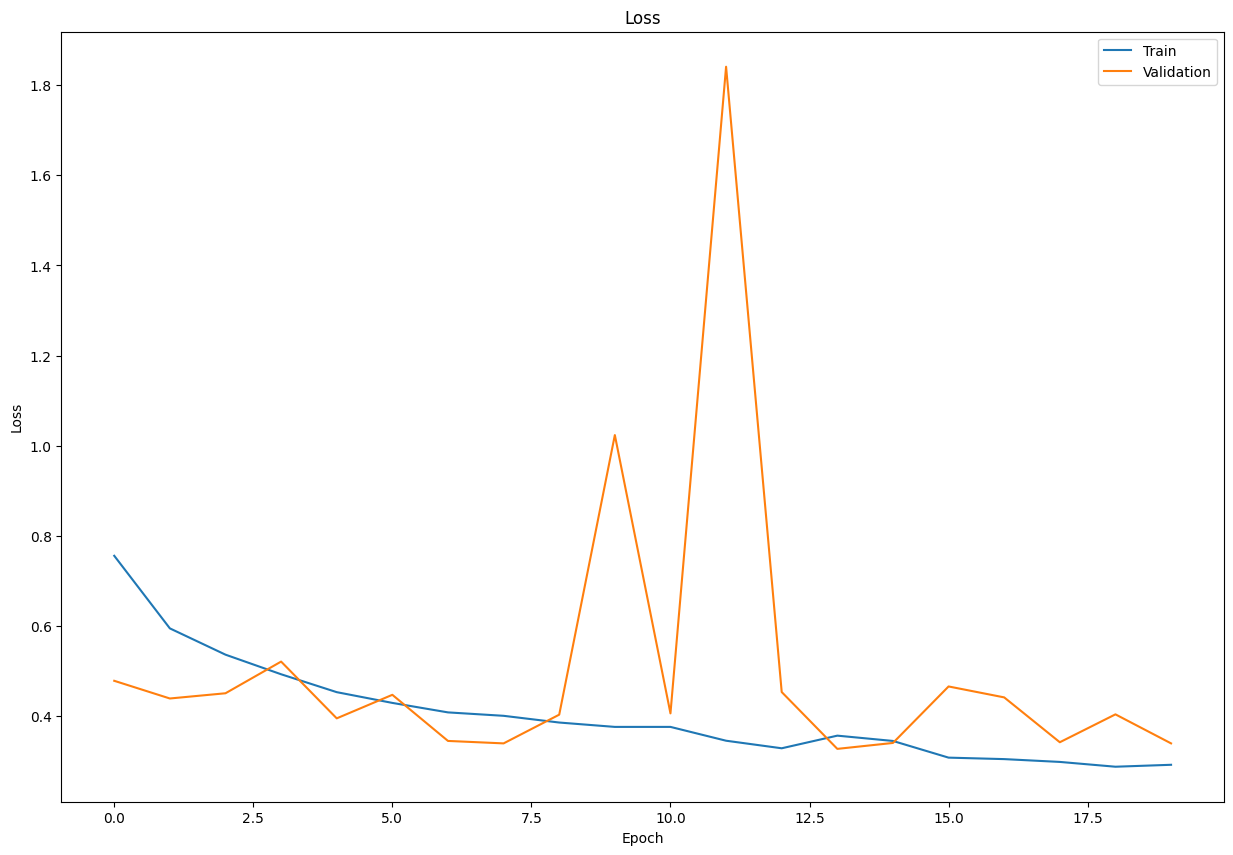

In [9]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

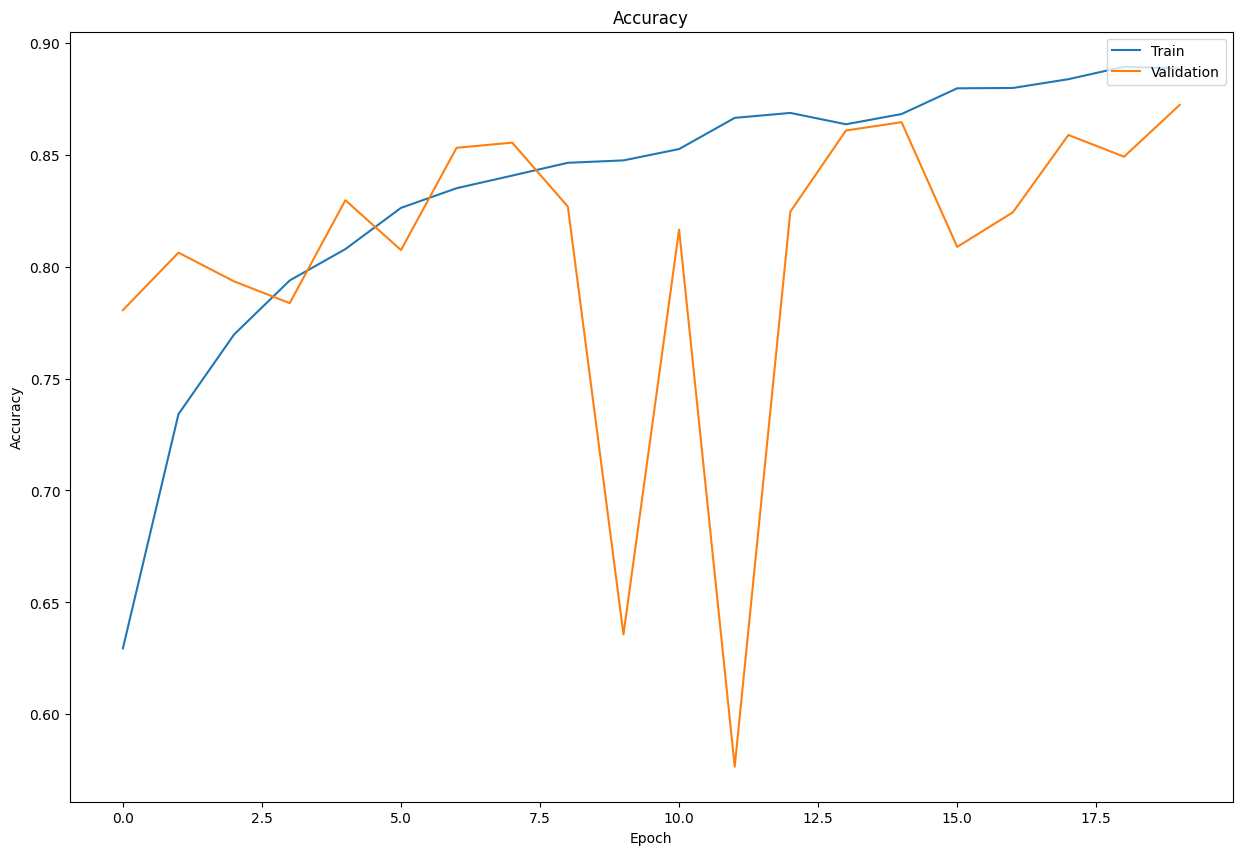

In [10]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(15, 10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [11]:
# test semtiment-classifier on test set

def sentiment_classifier(review):
    review = review.replace("br", "")
    review = vectorizer.transform([review]).toarray()
    prediction = model.predict(review)
    return "Positive" if prediction[0][1] > prediction[0][0] else "Negative" 

print(sentiment_classifier("The movie is fantastic!"))
print(sentiment_classifier("The movie is terrible!"))
print(sentiment_classifier("The movie is bad!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Negative


In [12]:
sentences =[
    "The movie is fantastic!",
    "The movie is terrible!",
    "The movie is bad!",
    "I feel like it is boring and seen before",
    "I loved the plot!",
    "The second is the best one in the series!"
]

# vectorize the sentences
vetorized_sentences = vectorizer.transform(sentences).toarray()

# predict the sentiment of the sentences
predictions = model.predict(vetorized_sentences)


for sentence, prediction in zip(sentences, predictions):
    pos_prob = np.round(prediction[1], 2)
    neg_prob =  np.round(prediction[0], 2)
    print(sentence, "-", "Positive: {}".format(pos_prob) if prediction[1] > prediction[0] else "Negative: {}".format(neg_prob))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The movie is fantastic! - Positive: 0.800000011920929
The movie is terrible! - Negative: 0.8100000023841858
The movie is bad! - Negative: 0.7599999904632568
I feel like it is boring and seen before - Negative: 0.5199999809265137
I loved the plot! - Positive: 0.6000000238418579
The second is the best one in the series! - Positive: 0.75
